# <p style="background-color:#0b032d;font-family:newtimeroman;color:#f4c095;font-size:150%;text-align:center ;border-radius:10px 10px;"> Análisis de Clústeres con K-Means </p>

## Importar librerias

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import copy

## Importar data

In [222]:
# Importar datos
# r : evitar problemas con la barras invertidas
data = pd.read_csv(r'data\telefonica.csv', sep= ",", index_col="IDCliente")
data.head(3)

,Genero,TerceraEdad,Casado,Dependientes,Meses,Telefono,LineasMultiples,Internet,Seguridad,BackUp,Proteccion,Soporte,StreamingTV,Peliculas,TipoContrato,FacturaElectronica,MetodoPago,UltimoCargo,TotalHistorico,Abandono
IDCliente,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,3,29.9,29.9,0
5575-GNVDE,1,1,0,0,34,1,0,1,1,0,1,0,0,0,1,0,4,57.0,1889.5,0
3668-QPYBK,1,1,0,0,2,1,0,1,1,1,0,0,0,0,0,1,4,53.9,108.2,1


In [223]:
data.describe()

,Genero,TerceraEdad,Casado,Dependientes,Meses,Telefono,LineasMultiples,Internet,Seguridad,BackUp,Proteccion,Soporte,StreamingTV,Peliculas,TipoContrato,FacturaElectronica,MetodoPago,UltimoCargo,TotalHistorico,Abandono
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.837853,0.483033,0.299588,32.371149,0.903166,0.421837,1.222916,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,2.574329,64.786724,2279.824223,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.778877,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.068104,30.089772,2266.730338,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.300000,18.800000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,35.500000,398.600000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,70.400000,1394.600000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,89.900000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,4.000000,118.800000,8684.800000,1.000000


Nota: <br>

* Aparentemente no hay datos faltantes en ninguna de las variables
* En el data set contiene en igual proporcion tanto el genero masculino como femenino
* En promedio los clientes poseen dos años y 6 meses, no son clientes nuevos
* El %90,3 de los clientes tienen linea telefonica 
* El %42,1 de los clientes cuentan con multiples servicios 
* El %26,5 de los clientes abandonan la empresa.

## Mapa de calor

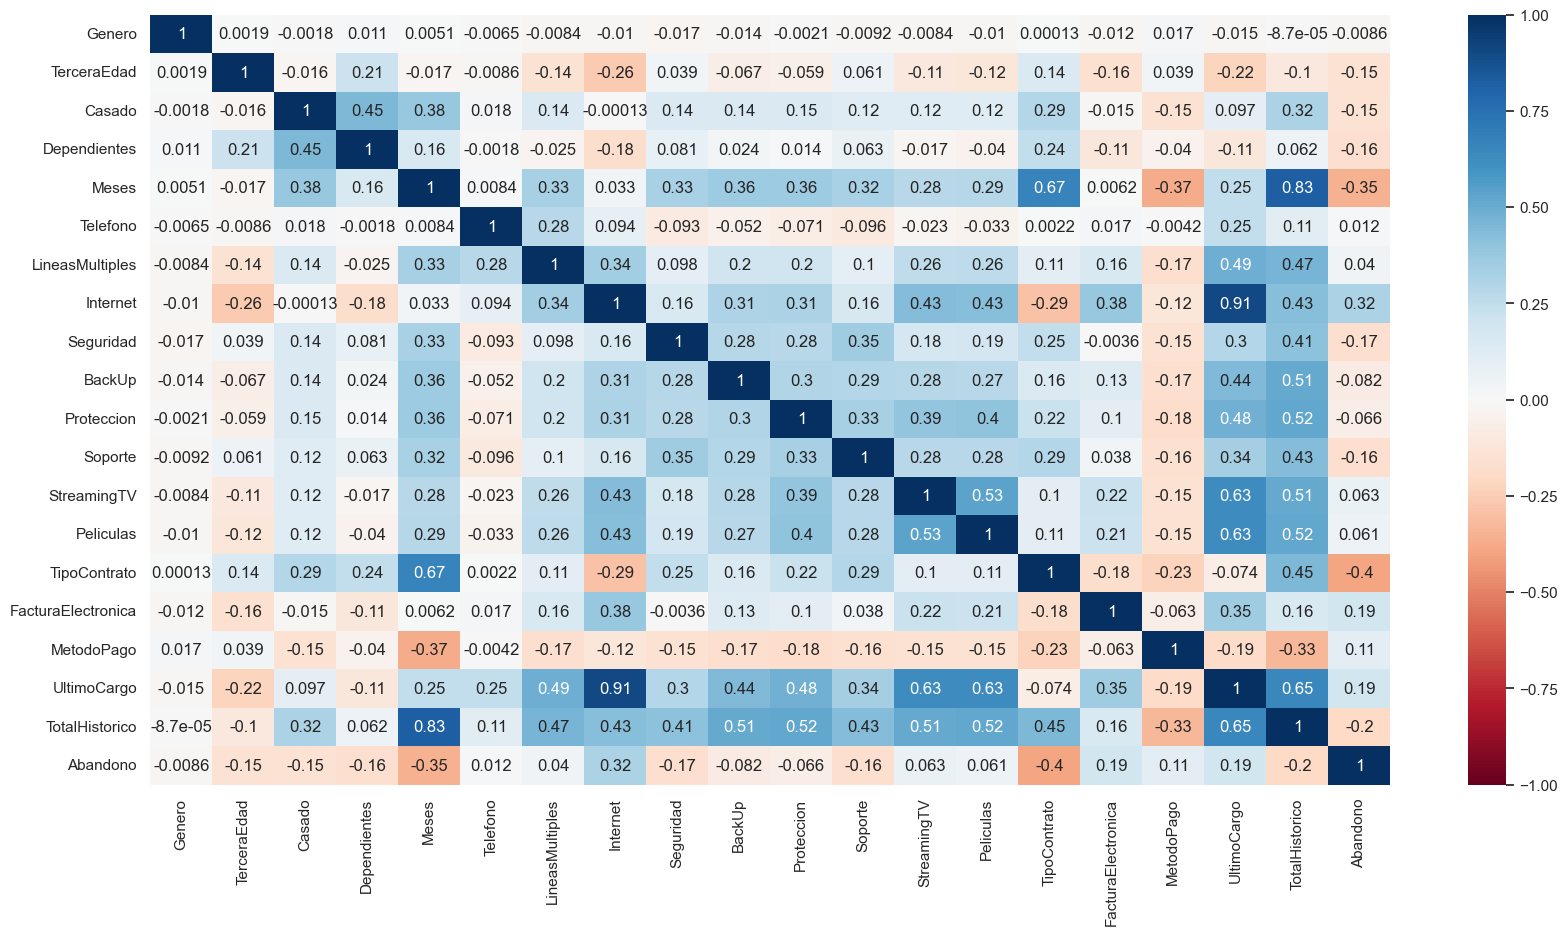

In [224]:
plt.figure(figsize= (20, 10))
sns.heatmap(
    data= data.corr(),
    annot= True,
    cmap="RdBu",
    vmin= -1,
    vmax= 1
)
plt.show()

Nota:

*Baja probabilidad de no abandono*<br>

* **tipo contrato:** Los clientes con contrato a un año o 2 años tienen menos probabilidad de abandono
* **meses:**: Los clientes antiguos tienen menos probabilidades de abandono
* **casados:**
* **dependientes** o personas a su cargo
* **Soporte:** Clientes con soporte tecnico 

*Mayor probabilidad de abandono*<br>

* **Personas con internet** 
* **Tercera edad**
* **factura electronica** 
* **MetodoPago:** Entre más complejo sea el metodo de pago mas probabilidades de abandono
* **Factura electronica:** 
* **Striming tv** y **Deportes** : cada una pesa alrededor del %6 respectivamente 

## Estandarizar datos

In [225]:
# crear objeto standar
standar = StandardScaler()

# Estandarizar los datos
data_std = standar.fit_transform(data)

In [226]:
# Mostrar datos, Estos datos muestras a cuantas desviaciones estandar están los datos 
data_std

array([[-1.00955867,  0.43991649,  1.03453023, ..., -1.15950368,
        -0.99265622, -0.60102348],
       [ 0.99053183,  0.43991649, -0.96662231, ..., -0.25880147,
        -0.17220925, -0.60102348],
       [ 0.99053183,  0.43991649, -0.96662231, ..., -0.36183383,
        -0.95811062,  1.66382851],
       ...,
       [-1.00955867,  0.43991649,  1.03453023, ..., -1.16947456,
        -0.85297376, -0.60102348],
       [ 0.99053183, -2.27315869,  1.03453023, ...,  0.31950917,
        -0.87057745,  1.66382851],
       [ 0.99053183,  0.43991649, -0.96662231, ...,  1.35980361,
         2.01391396, -0.60102348]])

## Determinar  K con el método del codo

Within cluster sum of squares = suma de cuadrados dentro delos clusteres (varianza)

In [227]:
# calcular el within cluster sum of square
wcss = []
for i in range(1, 11):
    kmean = KMeans(n_clusters= i, init= "k-means++", random_state= 99)
    kmean.fit(data_std)
    wcss.append(kmean.inertia_)

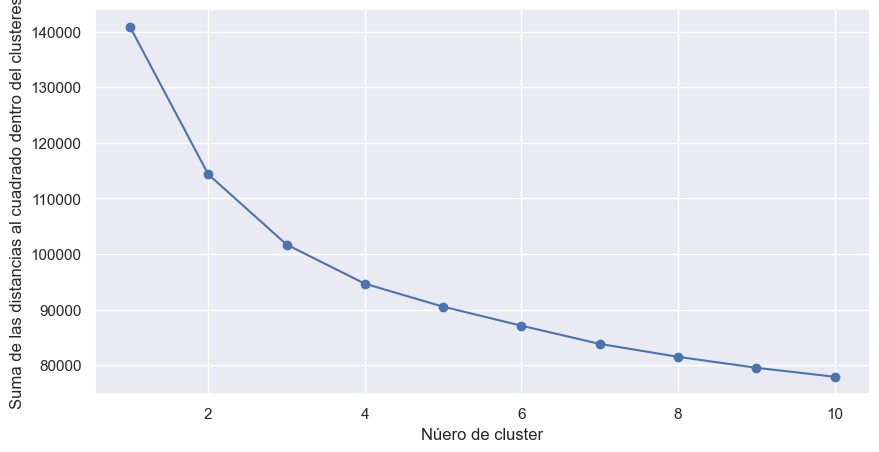

In [228]:
# Grafica del codo
plt.figure( figsize = (10,5))
plt.plot(range(1,11), wcss, marker = "o")
plt.xlabel('Núero de cluster')
plt.ylabel('Suma de las distancias al cuadrado dentro del clusteres')
plt.show()

**Nota:**
+ Apartir de cluster "4" la variaza no cambia en gran medida.
+ Los candidatos sestá en el cluster 4 y 5, eneste caso se tomará el 4

# Implementando K-Means Cluster 

In [229]:
# Crear el objeto cluster
cluster_4 = KMeans(n_clusters=4, init="k-means++", random_state=99)

# Hacer el fit con los datos standarizados
cluster_4.fit(data_std)

KMeans(n_clusters=4, random_state=99)

## Resultados<br>
- copiar los daros originales para gregar etiquetas
- esto es para optener las etiquetas y saber cual cluster le corresponde a cada uno

In [230]:
# Copiar datos para incertar el laber "etiqueta cluster"
data_copy = copy.deepcopy(data)

In [231]:
# Agregar etiquetas al dataframe original
data_copy['Cluster']= cluster_4.labels_

In [232]:
# Mostrar datos
data_copy.head(3)

,Genero,TerceraEdad,Casado,Dependientes,Meses,Telefono,LineasMultiples,Internet,Seguridad,BackUp,...,Soporte,StreamingTV,Peliculas,TipoContrato,FacturaElectronica,MetodoPago,UltimoCargo,TotalHistorico,Abandono,Cluster
IDCliente,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,1,0,1,0,0,1,0,1,...,0,0,0,0,1,3,29.9,29.9,0,0
5575-GNVDE,1,1,0,0,34,1,0,1,1,0,...,0,0,0,1,0,4,57.0,1889.5,0,1
3668-QPYBK,1,1,0,0,2,1,0,1,1,1,...,0,0,0,0,1,4,53.9,108.2,1,2


In [233]:
# Analizar la media de los datos teniendo en cunata el numero de cluster
# Esto se hace sacando la media de los datos y agrupando por cluster

df_analisis = data_copy.groupby('Cluster').mean()
# Mostrar la media de los grupos/Clusteres
df_analisis

,Genero,TerceraEdad,Casado,Dependientes,Meses,Telefono,LineasMultiples,Internet,Seguridad,BackUp,Proteccion,Soporte,StreamingTV,Peliculas,TipoContrato,FacturaElectronica,MetodoPago,UltimoCargo,TotalHistorico,Abandono
Cluster,,,,,,,,,,,,,,,,,,,,
0,0.513274,0.849558,0.452802,0.299410,31.500000,0.00000,0.000000,1.000000,0.411504,0.417404,0.443953,0.420354,0.414454,0.433628,0.676991,0.564897,2.597345,41.921976,1477.365929,0.250737
1,0.510428,0.965068,0.477059,0.419708,28.460897,1.00000,0.208551,0.206986,0.071429,0.044838,0.032847,0.050052,0.010428,0.008342,0.933264,0.296142,2.837331,27.385036,749.497862,0.067258
2,0.501448,0.752172,0.300786,0.138602,15.570542,1.00000,0.453041,1.756309,0.172942,0.263550,0.248655,0.173355,0.383533,0.387671,0.055441,0.767480,2.758792,78.165825,1260.508771,0.556061
3,0.500493,0.815764,0.715764,0.377833,56.360099,0.99803,0.727094,1.622167,0.583744,0.700985,0.717734,0.612808,0.728571,0.731527,1.221675,0.672414,2.098522,91.831773,5207.370099,0.111330


In [234]:
# Crear un archivo excel para analizar con mayor facilidad los resultados y guardar en carpeta data
# r : evitar problemas con la barras invertidas
# df_analisis.to_excel(r"data/resumen cluster.xlsx")

**Tip para evaluar resultados:** <br>

1. Identificar valores promedios más altos y bajos de las variables relevates compandos con los demas closteres.
2. Recapitular o hacer un resumen donde de los resultados
3. Con base a lo anteriror colocar label o etiquetas a los clusteres Ejemplo: Adultos mayores, madres con ingresos altos etc.
---



**Análisis de resultados:** <br>

Generalidades:
- El género no es relevante


**Cluster 0:** <br>
1. Es el grupo con mayor proporción de personas mayores.
2. No tienen interés en servicios telefónicos.
3. No les interesan las líneas múltiples; solo quieren internet básico.
4. Son el segundo grupo que contrata más servicios adicionales.
5. Es el que tiene una menos probabilidad de abandono<br>

**"Adultos mayores con Internet Básico"** <br>
Descripción: Este clúster está compuesto por personas mayores que no tienen interés en servicios telefónicos o líneas múltiples, y solo buscan un servicio de internet básico. Contratan una cantidad moderada de servicios adicionales. <br><br>

**Cluster 1:** <br>

1.Es el segundo grupo con mayor proporción de personas casadas.
2. Tienen la mayor cantidad de dependientes.
3. Son el segundo grupo más antiguo.
4. Tienen una alta cantidad de líneas múltiples.
5. No les interesa mucho los servicios adicionales como TV, películas, seguridad, respaldo, entre otros; solo priorizan el internet de alta velocidad.
6. Son el segmento con el contrato más largo.
7. Prefieren facturas en papel.
8. Prefieren métodos de pago físicos sobre los electrónicos.
9. Generan menos ingresos para la empresa. <br>

**"Familias Tradicionales con Alta Estabilidad"**
Descripción: Este clúster está formado por personas casadas con muchos dependientes y una preferencia por el internet de alta velocidad. Tienen contratos largos y prefieren métodos de pago y facturas físicos. Generan menos ingresos para la empresa. <br><br>

**Cluster 2:** <br>

1. Es el grupo más joven.
2. En su mayoría son solteros.
3. Tienen pocos dependientes.
4. Son el grupo con menos tiempo en la empresa.
5. Valoran mucho tener fibra óptica.
6. Son el segundo grupo con más líneas múltiples.
7. Tienen el contrato más corto.
8. Prefieren facturas electrónicas.
9. Son el segundo grupo que más ingresos genera para la empresa.
10. El cliente que la mayor probabilidad de abandona <br>

**"Jóvenes Solteros / Gamers**
Descripción: Este clúster consiste en personas jóvenes y solteras con pocos dependientes, que valoran mucho tener fibra óptica y prefieren facturas electrónicas. Son el segundo grupo en cuanto a líneas múltiples y generan buenos ingresos para la empresa <br><br>


**Cluster 3:** <br>

1. La mayoría están casados.
2. Tienen una alta cantidad de dependientes.
3. Son el grupo más antiguo.
4. Tienen el mayor número de líneas múltiples.
5. Valoran tener buena calidad de internet.
6. Les importa mucho tener soporte técnico, seguridad, TV y películas.
7. Tienen los contratos más largos.
8. Prefieren utilizar medios electrónicos para la notificación de su recibo.
9. Prefieren pagar por medios electrónicos como transferencias bancarias o tarjetas de crédito.
10. Son el grupo que más ingresos genera para la empresa. <br>

**"Usuarios Rentables"**
Descripción: Este clúster está compuesto por personas casadas con muchos dependientes, que valoran tener buena calidad de internet, soporte técnico, seguridad, TV y películas. Tienen contratos largos y prefieren medios electrónicos tanto para la facturación como para los pagos. Generan los mayores ingresos para la empresa.